<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/Regression_SalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and validate Data

In [3]:
df=pd.read_csv('Salary_Data_YOE.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


# Exploratory Data Analysis

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='Salary', ylabel='Count'>

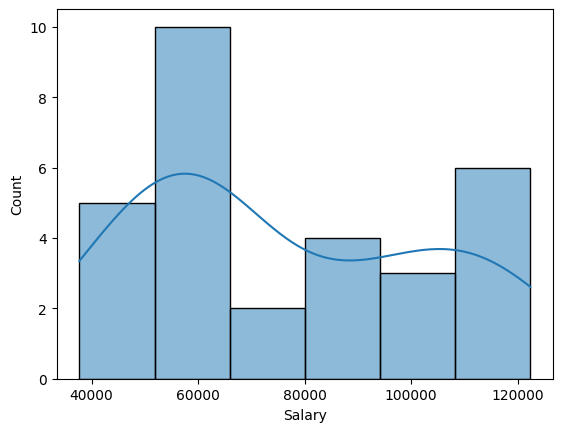

In [9]:
# distribution of salary
sns.histplot(df['Salary'],kde=True)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

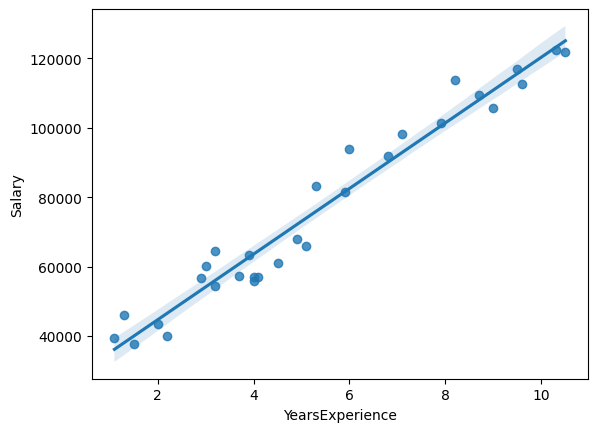

In [11]:
# relation between year of experience and salary
sns.regplot(x=df['YearsExperience'],y=df['Salary'],data=df)

## Data Preparation for ML Modelling

In [15]:
# target and feature
X=df.drop(columns=['Salary'])
y=df['Salary']
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# train test split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
model=LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_predict=model.predict(X_test)

In [22]:
y_test[0:5]

27    112635
15     67938
23    113812
17     83088
8      64445
Name: Salary, dtype: int64

In [23]:
y_predict[0:5]

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548])

#Performance Evalution

In [33]:
df_res=pd.DataFrame({"Predicted Value":y_predict,"Actual Value":y_test,"Error Value":y_test-y_predict,
                     "Absolute Error":np.abs(y_test-y_predict),"Squared Error":np.square(y_test-y_predict)})
df_res

,Predicted Value,Actual Value,Error Value,Absolute Error,Squared Error
27,115790.210113,112635,-3155.210113,3155.210113,9.955351e+06
15,71498.278095,67938,-3560.278095,3560.278095,1.267558e+07
23,102596.868661,113812,11215.131339,11215.131339,1.257792e+08
17,75267.804224,83088,7820.195776,7820.195776,6.115546e+07
8,55477.792045,64445,8967.207955,8967.207955,8.041082e+07
9,60189.699707,57189,-3000.699707,3000.699707,9.004199e+06


In [36]:
sum_abs_error=df_res['Absolute Error'].sum()
print("Absolute Error",sum_abs_error )
MAE=sum_abs_error/len(df_res)
print("MAE-Mean Absolute Error",MAE )

Absolute Error 37718.72298454649


In [47]:
sum_sqr_error=df_res['Squared Error'].sum()
print("Squared Error",sum_sqr_error )
MSE=sum_sqr_error/len(df_res)
print("MSE-Mean Squared Error",MSE )

Squared Error 298980581.1354503
MAE-Mean Squared Error 49830096.85590839


In [48]:
rmse=np.sqrt(MSE)
print("RMSE-Root Mean Squared Error",MSE )

RMSE-Root Mean Squared Error 49830096.85590839


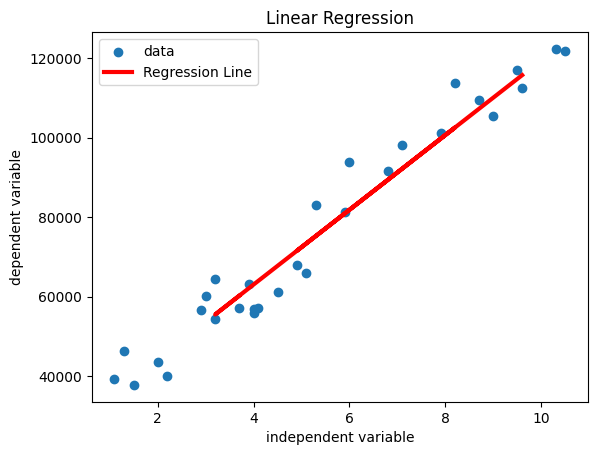

In [53]:
plt.scatter(X,y,label='data')
plt.plot(X_test,y_predict,color='red', linewidth=3, label='Regression Line')
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.title('Linear Regression')
plt.legend()